In [1]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import scipy.stats as stats
from sklearn import metrics
import scipy
from scipy import optimize

# Mixing enthalpy vs molar fraction of acetone

In [2]:
mix = {0.1:547.1,0.2:556.9,0.9:-269.0,0.8:-302.6,0.6:-117.8,0.5:33.2,0.4:224.6}

In [3]:
mix_sorted = {0.1:547.1,0.2:556.9,0.4:224.6,0.5:33.2,0.6:-117.8,0.8:-302.6,0.9:-269.0}

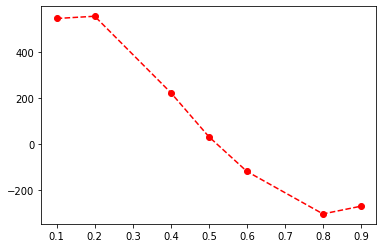

In [4]:
plt.plot(mix_sorted.keys(),mix_sorted.values(),'--r',marker='o')

In [9]:
xacetone = list(mix_sorted.keys())
dH = list(mix_sorted.values())

In [11]:
xwater = [round((1-x),1) for x in xacetone]
print(xacetone) # acetone
print(xwater) # water

[0.1, 0.2, 0.4, 0.5, 0.6, 0.8, 0.9]
[0.9, 0.8, 0.6, 0.5, 0.4, 0.2, 0.1]


In [12]:
dh = [14606.6,16076.8,4072.1,498.8,-1484.5,-2968.8,-2394.4]
print(dH)

[547.1, 556.9, 224.6, 33.2, -117.8, -302.6, -269.0]


In [13]:
T_err = 0.14
q_cal = [13465.5,2450.2,3024.6,1263.7,1908.4,2237.5,3960.3]
dT_exp = [6.4,0.6,1.9,1.5,1.4,-0.5,-1.9]
dT_cal = [5.9,1.0,2.1,1.7,1.8,1.1,2.4]
q_exp = [14606.6,2100.2,-2349.4,-631.8,1459.4,2097.6,3960.3]
q_cal_error = []
q_exp_error = [math.sqrt((((x/dT_cal[q_cal.index(x)])*T_err)**2)+((-(x*dT_exp[q_cal.index(x)])/(dT_cal[q_cal.index(x)]**2)*T_err))**2) for x in q_cal]

In [14]:
print(q_exp_error)

[471.40603732364684, 400.03595331699876, 271.92214546716286, 138.78922092301542, 188.04167245449833, 312.81108687838844, 294.6479565254887]


In [15]:
nwater = [24.0,24.0,12.0,8.0,5.3,2.0,0.9]
nacetone = [2.7,6.0,8.0,8.0,8.0,8.0,8.0]
dh_err = [math.sqrt(((1/(nacetone[q_exp_error.index(x)]+nwater[q_exp_error.index(x)]))*x)**2) for x in q_exp_error]

In [16]:
print(dh_err)

[17.655656828601007, 13.334531777233291, 13.596107273358143, 8.674326307688464, 14.138471613120174, 31.281108687838845, 33.10651196915604]


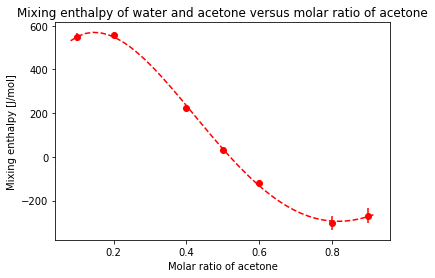

In [17]:
df = pd.DataFrame({'x':xacetone,'y':dH})

model1 = np.poly1d(np.polyfit(df.x, df.y, 1))
model2 = np.poly1d(np.polyfit(df.x, df.y, 2))
model3 = np.poly1d(np.polyfit(df.x, df.y, 3))
model4 = np.poly1d(np.polyfit(df.x, df.y, 4))
model5 = np.poly1d(np.polyfit(df.x, df.y, 5))

#create scatterplot
plt.scatter(df.x, df.y,color='r')
plt.errorbar(df.x, df.y,color='r',ls='None',xerr=0,yerr=dh_err,)
plt.title("Mixing enthalpy of water and acetone versus molar ratio of acetone")
plt.xlabel("Molar ratio of acetone")
plt.ylabel("Mixing enthalpy [J/mol]")
polyline = np.linspace(0,1)

#add fitted polynomial lines to scatterplot 
# plt.plot(polyline, model1(polyline), color='green')
# plt.plot(polyline, model2(polyline), color='red')
# plt.plot(polyline[4:46], model3(polyline)[4:46], '--r')
plt.plot(polyline[4:46], model4(polyline)[4:46], '--r')
# plt.plot(polyline, model5(polyline), color='orange')

# plt.errorbar(df.x,df.y,ls='None',xerr=0,yerr=dh_err_sorted)

plt.show()

In [18]:
dH = [547.1,535.9,203.6,30.6,-111.6,-296.6,-269]
# dHacetone = [x-xwater[dH.index(x)]*x for x in dH]
# dHwater = [x+xacetone[dH.index(x)]*x for x in dH]

dHwater = [x-xacetone[dH.index(x)]*x for x in dH]
dHacetone = [x+xwater[dH.index(x)]*x for x in dH]

In [19]:
print([round(x,1) for x in dHacetone])
print([round(x,1) for x in dHwater])

[1039.5, 964.6, 325.8, 45.9, -156.2, -355.9, -295.9]
[492.4, 428.7, 122.2, 15.3, -44.6, -59.3, -26.9]


In [29]:
print(dH)
dHa_err = [abs(x*dh_err[xwater.index(x)]) for x in xwater]
print(dHa_err)

[547.1, 535.9, 203.6, 30.6, -111.6, -296.6, -269]
[15.890091145740907, 10.667625421786633, 8.157664364014886, 4.337163153844232, 5.65538864524807, 6.25622173756777, 3.310651196915604]


In [30]:
dHb_err = [abs(x*dh_err[xacetone.index(x)]) for x in xacetone]

In [31]:
print(dHb_err)

[1.7655656828601007, 2.6669063554466583, 5.438442909343258, 4.337163153844232, 8.483082967872104, 25.02488695027108, 29.795860772240434]


In [32]:
print(q_exp_error)

[471.40603732364684, 400.03595331699876, 271.92214546716286, 138.78922092301542, 188.04167245449833, 312.81108687838844, 294.6479565254887]


In [33]:
dh_err

[17.655656828601007,
 13.334531777233291,
 13.596107273358143,
 8.674326307688464,
 14.138471613120174,
 31.281108687838845,
 33.10651196915604]

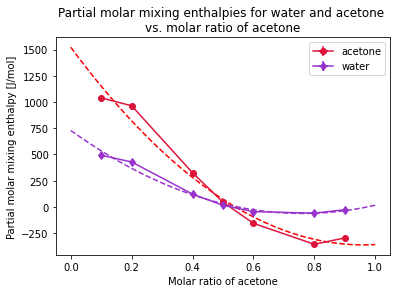

In [34]:
# plt.plot(xacetone,dha,color='crimson',marker='o',ls='None',label='acetone')
plt.errorbar(xacetone,dHacetone,color='crimson',marker='o',label='acetone',xerr=0,yerr=dHa_err)
# plt.plot(xacetone,dhb,color='darkorchid',marker='d',ls='None',label='water')
plt.errorbar(xacetone,dHwater,color='darkorchid',marker='d',label='water',xerr=0,yerr=dHb_err)

df1 = pd.DataFrame({'x':xacetone,'y':dHacetone})
df2 = pd.DataFrame({'x':xacetone,'y':dHwater})

modela1 = np.poly1d(np.polyfit(df1.x, df1.y, 1))
modela2 = np.poly1d(np.polyfit(df1.x, df1.y, 2))
modela3 = np.poly1d(np.polyfit(df1.x, df1.y, 3))
modela4 = np.poly1d(np.polyfit(df1.x, df1.y, 4))
modela5 = np.poly1d(np.polyfit(df1.x, df1.y, 5))

modelb1 = np.poly1d(np.polyfit(df2.x, df2.y, 1))
modelb2 = np.poly1d(np.polyfit(df2.x, df2.y, 2))
modelb3 = np.poly1d(np.polyfit(df2.x, df2.y, 3))
modelb4 = np.poly1d(np.polyfit(df2.x, df2.y, 4))
modelb5 = np.poly1d(np.polyfit(df2.x, df2.y, 5))

polyline = np.linspace(0,1)

#plt.plot(polyline, modela1(polyline), color='green')
plt.plot(polyline, modela2(polyline), '--r')
#plt.plot(polyline, modela3(polyline), color='blue')
#plt.plot(polyline, modela4(polyline), color='blue')
#plt.plot(polyline, modela5(polyline), color='orange')

polyline2 = np.linspace(0,1)

#plt.plot(polyline2, modelb1(polyline2), color='green')
plt.plot(polyline2, modelb2(polyline2), 'darkorchid',ls='dashed')
#plt.plot(polyline2, modelb3(polyline2), color='blue')
#plt.plot(polyline2, modelb4(polyline2), color='blue')
#plt.plot(polyline2, modelb5(polyline2), color='orange')

plt.title("""Partial molar mixing enthalpies for water and acetone 
vs. molar ratio of acetone""")
plt.xlabel("Molar ratio of acetone")
plt.ylabel("Partial molar mixing enthalpy [J/mol]")
plt.legend()
